In [70]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")


In [71]:
class Perceptron:
    # constructor
    def __init__(self,eta:float=None, epochs:int=None):
        self.weights = np.random.random(3) * 1e-4 #small random weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"intial weight before training \n{self.weights}")

        self.eta = eta
        self.epochs = epochs


    def _z_outcome(self,inputs,weights):
        return np.dot(inputs, weights)

    def activation_function(self,z):
        return np.where(z >0 , 1,0)

    def fit(self,X,y):
        self.X=X
        self.y= y

        X_with_bias = np.c_[self.X, -np.ones((len(self.X),1))]
        print(f"X with bias : \n {X_with_bias}")

        for epoch in range(self.epochs):
            print("- -"*10)
            print(f"for eopch >> {epoch}")
            print("- -"*10)

            z = self._z_outcome(X_with_bias,self.weights)
            y_hat = self.activation_function(z)
            print(f"prediction value after forward pass : \n {y_hat}")
            self.error = self.y - y_hat
            print(f"error is \n{self.error}")

            # weight update

            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch {epoch}/{self.epochs} : \n{self.weights}")

            print("##"*10)


        

    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X),1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)

    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f" total loss : {total_loss} \n")
        return total_loss

    def create_dir_return_path(self,model_dir, filename):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir,filename)

    def save(self,filename, model_dir=None):
        if model_dir is not None:
            model_file_path  = self.create_dir_return_path(model_dir,filename)
            joblib.dump(self,model_file_path)
        else:
            model_file_path = self.create_dir_return_path("model",filename)
            joblib.dump(self,model_file_path)

    def load(self,filepath):
        return joblib.load(filepath)


In [72]:
def prepare_date(df, target_col ="y"):
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    return X,y

In [73]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,0,0,1]
}

df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [74]:
X,y = prepare_date(df_AND)

ETA = 0.1 # between 0 to 1
EPOCHS = 10 

model_and = Perceptron(eta=ETA,epochs=EPOCHS)
model_and.fit(X,y)

_ = model_and.total_loss()

intial weight before training 
[3.32455872e-05 7.86895449e-05 3.50405548e-05]
X with bias : 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
- -- -- -- -- -- -- -- -- -- -
for eopch >> 0
- -- -- -- -- -- -- -- -- -- -
prediction value after forward pass : 
 [0 1 0 1]
error is 
0    0
1   -1
2    0
3    0
Name: y, dtype: int64
updated weights after epoch 0/10 : 
[ 3.32455872e-05 -9.99213105e-02  1.00035041e-01]
####################
- -- -- -- -- -- -- -- -- -- -
for eopch >> 1
- -- -- -- -- -- -- -- -- -- -
prediction value after forward pass : 
 [0 0 0 0]
error is 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch 1/10 : 
[1.00033246e-01 7.86895449e-05 3.50405548e-05]
####################
- -- -- -- -- -- -- -- -- -- -
for eopch >> 2
- -- -- -- -- -- -- -- -- -- -
prediction value after forward pass : 
 [0 1 1 1]
error is 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch 2/10 : 
[ 3.32455872e-05 -9.99213105e-02  2.0

In [75]:
model_and.save(filename="and.model.pkl")

In [76]:
reload_model_and= Perceptron().load(filepath="/Users/sachinsen/Documents/Deep Learning/Perceptron/model/and.model.pkl")
reload_model_and.predict(X= [[1,0]])

array([0])

In [77]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,1]
}

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [78]:
X,y = prepare_date(df_OR)

ETA = 0.1 # between 0 to 1
EPOCHS = 10 

model_or = Perceptron(eta=ETA,epochs=EPOCHS)
model_or.fit(X,y)

_ = model_or.total_loss()

intial weight before training 
[5.51902171e-05 2.20545293e-05 9.72377439e-05]
X with bias : 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
- -- -- -- -- -- -- -- -- -- -
for eopch >> 0
- -- -- -- -- -- -- -- -- -- -
prediction value after forward pass : 
 [0 0 0 0]
error is 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch 0/10 : 
[ 0.20005519  0.20002205 -0.29990276]
####################
- -- -- -- -- -- -- -- -- -- -
for eopch >> 1
- -- -- -- -- -- -- -- -- -- -
prediction value after forward pass : 
 [1 1 1 1]
error is 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch 1/10 : 
[ 0.20005519  0.20002205 -0.19990276]
####################
- -- -- -- -- -- -- -- -- -- -
for eopch >> 2
- -- -- -- -- -- -- -- -- -- -
prediction value after forward pass : 
 [1 1 1 1]
error is 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch 2/10 : 
[ 0.20005519  0.20002205 -0.09990276]
####################

In [79]:
model_or.save(filename="or.model.pkl",model_dir="Or_Model")

In [80]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [81]:
X,y = prepare_date(df_XOR)

ETA = 0.1 # between 0 to 1
EPOCHS = 10 

model_xor = Perceptron(eta=ETA,epochs=EPOCHS)
model_xor.fit(X,y)

_ = model_xor.total_loss()

intial weight before training 
[6.34430517e-05 2.07863449e-05 4.83446012e-05]
X with bias : 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
- -- -- -- -- -- -- -- -- -- -
for eopch >> 0
- -- -- -- -- -- -- -- -- -- -
prediction value after forward pass : 
 [0 0 1 1]
error is 
0    0
1    1
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch 0/10 : 
[-9.99365569e-02  2.07863449e-05  4.83446012e-05]
####################
- -- -- -- -- -- -- -- -- -- -
for eopch >> 1
- -- -- -- -- -- -- -- -- -- -
prediction value after forward pass : 
 [0 0 0 0]
error is 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch 1/10 : 
[ 6.34430517e-05  1.00020786e-01 -1.99951655e-01]
####################
- -- -- -- -- -- -- -- -- -- -
for eopch >> 2
- -- -- -- -- -- -- -- -- -- -
prediction value after forward pass : 
 [1 1 1 1]
error is 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch 2/10 : 
[-9.99365569e-02  2.07863449e-05  

In [82]:
def save_plot(df,model, filename="plot.png" ,plot_dir = "plots"):
    def _create_base_plot(df):
        df.plot(kind = "scatter", x="x1",y="x2", c="y", s=100, cmap = "coolwarm")
        plt.axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
        plt.axvline(x=0, color = "black", linestyle = "--", linewidth = 1)

        figure = plt.gcf()
        figure.set_size_inches(10,8)


    def _plot_decision_regions(X,y,classfier, resolution= 0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        X= X.values #as an array
        x1 = X[:, 0]
        x2 = X[:, 1]

        x1_min, x1_max = x1.min() - 1 , x1.max() + 1
        x2_min, x2_max = x2.min() - 1 , x2.max() + 1

        xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max, resolution ),
                               np.arange (x2_min,x2_max, resolution))


        y_hat= classfier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)

        plt.contourf(xx1,xx2,y_hat, alpha = 0.3 , cmap= cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        plt.plot()


    X,y = prepare_date(df)

    _create_base_plot(df)
    _plot_decision_regions(X,y,model)

    os.makedirs(plot_dir, exist_ok=True) #to create directory
    plot_path = os.path.join(plot_dir,filename)
    plt.savefig(plot_path)




In [83]:
os.getcwd()

'/Users/sachinsen/Documents/Deep Learning/Perceptron'

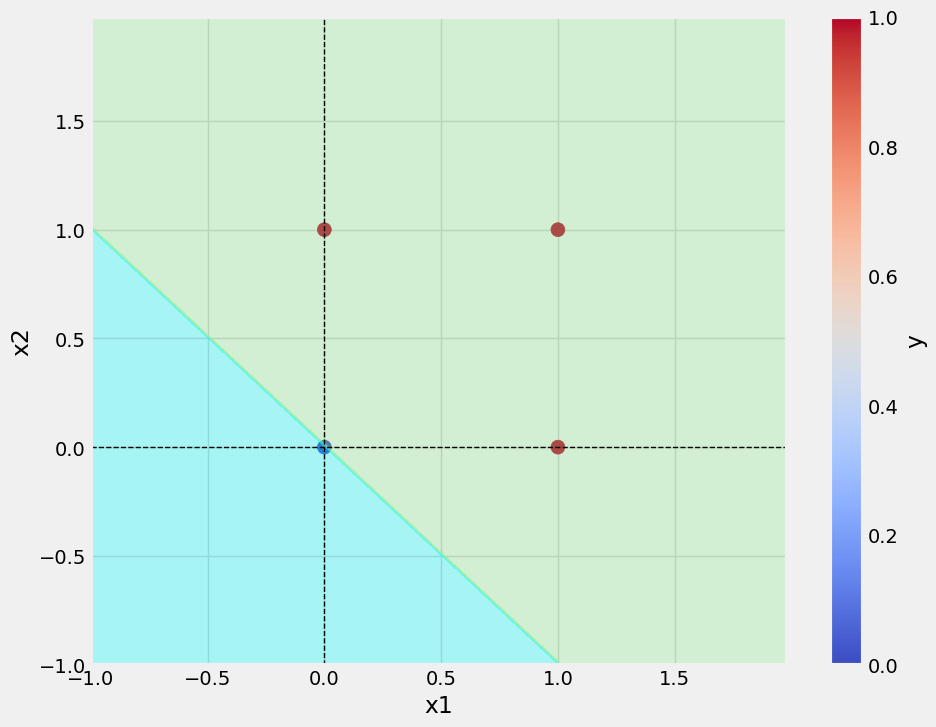

In [91]:
save_plot(df_OR,model=model_or, filename="or.png")